In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gp
%matplotlib inline

In [5]:
tops=pd.read_csv(r'D:\prbtops.csv')
small=tops.head()

In [6]:
tops

,api,formation,depth,ssdepth
0,105177,FRONTIER,1180.0,error-No Elev. data
1,105177,MUDDY,1904.0,error-No Elev. data
2,105177,DAKOTA,2040.0,error-No Elev. data
3,105177,LAKOTA,2080.0,error-No Elev. data
4,105177,MORRISON,2120.0,error-No Elev. data
5,105177,CHUGWATER,2580.0,error-No Elev. data
6,105177,CASPER-TENSLEEP,3518.0,error-No Elev. data
7,105195,SHANNON,762.0,6294
8,105195,FRONTIER,2436.0,4620
9,105195,MUDDY,3172.0,3884


In [7]:
n_wells = tops.api.unique().shape[0]
n_formations = tops.formation.unique().shape[0]

print('Number of wells: {}'.format(n_wells))
print('Number of formations: {}'.format(n_formations))
print('Sparsity: {:4.3f}%'.format(float(tops.shape[0]) / float(n_wells*n_formations) * 100))

Number of wells: 7039
Number of formations: 686
Sparsity: 0.522%


In [8]:
formation_to_idx = {}
idx_to_formation = {}
for (idx, formation) in enumerate(tops.formation.unique().tolist()):
    formation_to_idx[formation] = idx
    idx_to_formation[idx] = formation
    
api_to_idx = {}
idx_to_api = {}
for (idx, api) in enumerate(tops.api.unique().tolist()):
    api_to_idx[api] = idx
    idx_to_api[idx] = api

In [9]:
def map_ids(row, mapper):
    return mapper[row]
import scipy.sparse as sparse


In [156]:
#%%timeit
I = tops.api.apply(map_ids, args=[api_to_idx]).as_matrix()
J = tops.formation.apply(map_ids, args=[formation_to_idx]).as_matrix()
V = tops.depth.astype(int)
likes = sparse.coo_matrix((V, (I, J)), dtype=np.float64)
likes = likes.tocsr()

In [157]:
print('Number of data points: {}'.format(n_wells*n_formations))

Number of data points: 4828754


In [201]:
from scipy.sparse.linalg import svds
from sklearn.decomposition import TruncatedSVD
U, sigma, Vt = svds(likes, k=100)

In [202]:
from sklearn.utils.extmath import randomized_svd

#U, sigma, Vt = randomized_svd(likes, n_components=400, n_iter=500, random_state=52)

In [203]:
sigma = np.diag(sigma)

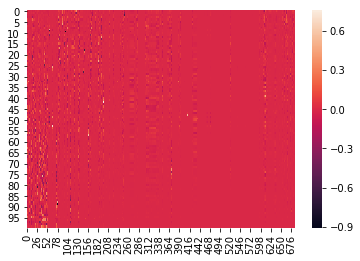

In [204]:
import seaborn as sns

sns.heatmap(Vt)
meandepths=np.mean(likes, axis=1)
likesdemeaned = likes-meandepths.reshape(-1,1)

In [205]:
all_tops= np.dot(np.dot(U, sigma), Vt) + meandepths.reshape(-1,1)

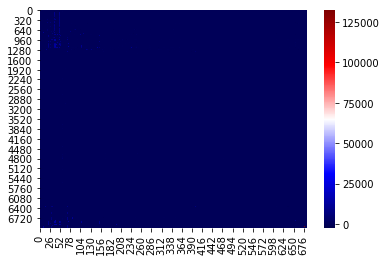

In [206]:
sns.heatmap(all_tops, cmap='seismic')

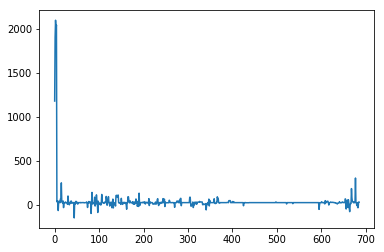

In [207]:
plt.plot(np.ndarray.flatten(np.asarray(all_tops[0])))

In [190]:
tops[tops['api']==105177]

,api,formation,depth,ssdepth
0,105177,FRONTIER,1180.0,error-No Elev. data
1,105177,MUDDY,1904.0,error-No Elev. data
2,105177,DAKOTA,2040.0,error-No Elev. data
3,105177,LAKOTA,2080.0,error-No Elev. data
4,105177,MORRISON,2120.0,error-No Elev. data
5,105177,CHUGWATER,2580.0,error-No Elev. data
6,105177,CASPER-TENSLEEP,3518.0,error-No Elev. data


In [97]:
idx_to_formation

{0: 'WASATCH',
 1: 'LANCE',
 2: 'LANCE - OVER PRESSURE',
 3: 'JONAH',
 4: 'YELLOW POINT',
 5: 'WARDELL',
 6: 'MESAVERDE',
 7: nan,
 8: 'LEWIS',
 9: 'FORT UNION',
 10: 'FORT UNION BASE',
 11: 'LANCE UPPER',
 12: 'LANCE LOWER',
 13: 'ERICSON',
 14: 'FORT UNION TOP',
 15: 'BASE FORT UNION',
 16: 'UPPER LANCE',
 17: 'LOWER LANCE',
 18: 'UPPER MESAVERDE',
 19: 'UPPERMESAVERDE',
 20: 'TOP OF YELLOW POINT',
 21: 'TERTIARY LAKE',
 22: 'MESAVERDE UPPER',
 23: 'TD',
 24: 'FORT UNION LOWER',
 25: 'FORT UNION UPPER',
 26: 'TERTIARY',
 27: 'BIOS MARKER',
 28: 'BOIS MARKER',
 29: 'B ASE FORT UNION',
 30: 'MESVAERDE UPPER',
 31: 'LANCE-UPPER',
 32: 'LANCE-LOWER',
 33: 'LANCE SH',
 34: 'LANCE B',
 35: 'LANCE M',
 36: 'LANCE TOP UPPER',
 37: 'JONAH TOP',
 38: 'YELLOWPOINT TOP',
 39: 'WARDELL TOP',
 40: 'YELLOWPOINT',
 41: 'LANCE UPPER TOP',
 42: 'YELLOW POINT TOP',
 43: 'UNNAMED TERTIARY',
 44: 'BOIS MARK',
 45: 'BASE FT. UNION',
 46: 'LANCE- UPPER',
 47: 'MESAVERDE-UPPER',
 48: 'LANCE TOP OF UPPER',
 

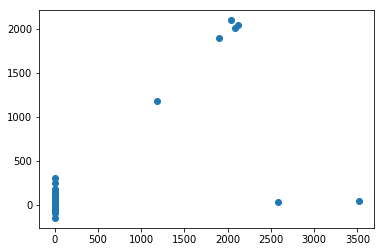

In [208]:
plt.scatter(np.asarray(likes[0].todense()),np.ndarray.flatten(np.asarray(all_tops[0])))

In [187]:
np.asarray(likes[0].todense())

array([[1180., 1904., 2040., 2080., 2120., 2580., 3518.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
      